<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Module 1:</span> Data Cleaning and Exploratory Data Analysis</h1>

In this module, we'll cover:
1. [Import modules](#modules)
2. [Loading data and data structure visualization](#loading)
3. [Data Cleaning](#clean)<br>
   3.1. [General cleaning](#general)<br>
   3.2. [Body cleaning](#body)<br>
   3.3. [Tags Cleaning](#tags)<br>
4. [Data Exploration](#exploratory)<br>
<hr>

<span id="modules"></span>
## 1. Import modules

In [1]:
#import moduls
import glob
import pandas as pd
from pandas import Series
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from textblob import Word
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Joël\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Joël\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Joël\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<span id="loading"></span>
## 2. Loading data and data structure visualization

In [2]:
_start_time = time.time()
#start time
def tic():
    global _start_time 
    _start_time = time.time()
#end time
def tac():
    t_sec = round(time.time() - _start_time)
    (t_min, t_sec) = divmod(t_sec,60)
    (t_hour,t_min) = divmod(t_min,60) 
    print('Time passed: {}hour:{}min:{}sec'.format(t_hour,t_min,t_sec))

In [2]:
# Load and merge the 21 dataset dowloaded from stack exchange
df = pd.concat([pd.read_csv(f) for f in glob.glob('QueryResults (*).csv')], ignore_index = True)

In [3]:
#original time
df.shape

(787895, 22)

In [4]:
df.head()

Id  PostTypeId  AcceptedAnswerId  ParentId         CreationDate  \
0   4           1               7.0       NaN  2008-07-31 21:42:52   
1   6           1              31.0       NaN  2008-07-31 22:08:08   
2   7           2               NaN       4.0  2008-07-31 22:17:57   
3   9           1            1404.0       NaN  2008-07-31 23:40:59   
4  11           1            1248.0       NaN  2008-07-31 23:55:37   

   DeletionDate  Score  ViewCount  \
0           NaN    570    36973.0   
1           NaN    256    16277.0   
2           NaN    401        NaN   
3           NaN   1743   478891.0   
4           NaN   1347   135780.0   

                                                Body  OwnerUserId  \
0  <p>I want to use a track-bar to change a form'...          8.0   
1  <p>I have an absolutely positioned <code>div</...          9.0   
2  <p>An explicit cast to double like this isn't ...          9.0   
3  <p>Given a <code>DateTime</code> representing ...          1.0   
4  <p>Given a specific <code>DateTime</code> valu...          1.0   

          ...          LastEditorDisplayName         LastEditDate  \
0         ...                         Rich B  2018-07-02 17:55:27   
1         ...                         Rich B  2016-03-19 06:05:48   
2         ...                            NaN  2017-12-16 05:06:57   
3         ...                         Rich B  2018-04-21 17:48:14   
4         ...                    user2370523  2017-06-04 15:51:19   

      LastActivityDate                                              Title  \
0  2018-07-02 17:55:27                         Convert Decimal to Double?   
1  2016-03-19 06:10:52  Percentage width child element in absolutely p...   
2  2017-12-16 05:06:57                                                NaN   
3  2018-07-25 11:57:14            How do I calculate someone's age in C#?   
4  2018-07-05 04:00:56                      Calculate relative time in C#   

                                                Tags AnswerCount CommentCount  \
0  <c#><floating-point><type-conversion><double><...        13.0            1   
1             <html><css><css3><internet-explorer-7>         5.0            0   
2                                                NaN         NaN            0   
3                               <c#><.net><datetime>        64.0            7   
4  <c#><datetime><time><datediff><relative-time-s...        35.0            3   

   FavoriteCount  ClosedDate   CommunityOwnedDate  
0           41.0         NaN  2012-10-31 16:42:47  
1           10.0         NaN                  NaN  
2            NaN         NaN                  NaN  
3          399.0         NaN  2011-08-16 19:40:43  
4          529.0         NaN  2009-09-04 13:15:59  

[5 rows x 22 columns]

In [5]:
df.to_csv('StackOverflow.csv')

<span id="clean"></span>
## 3. Data Cleaning<br>
   3.1. [General cleaning](#general)<br>
   3.2. [Body cleaning](#body)<br>
   3.3. [Tags Cleaning](#tags)<br>

<span id="general"></span>
#### 3.1. General cleaning

In [7]:
#Missing values by feature
tab=pd.DataFrame(df.isnull().sum(),columns=['Missing value'])
tab['%']=tab['Missing value']/df.shape[0]*100
tab

Missing value           %
Id                                 0    0.000000
PostTypeId                         0    0.000000
AcceptedAnswerId              650328   82.539932
ParentId                      185491   23.542604
CreationDate                       0    0.000000
DeletionDate                  787895  100.000000
Score                              0    0.000000
ViewCount                     602404   76.457396
Body                               0    0.000000
OwnerUserId                    44230    5.613692
OwnerDisplayName              288965   36.675572
LastEditorUserId              515803   65.465957
LastEditorDisplayName         664075   84.284708
LastEditDate                  511279   64.891769
LastActivityDate                   0    0.000000
Title                         602404   76.457396
Tags                          602403   76.457269
AnswerCount                   602404   76.457396
CommentCount                       0    0.000000
FavoriteCount                 678759   86.148408
ClosedDate                    777261   98.650328
CommunityOwnedDate            759838   96.438993

In [8]:
#Selecting majors features
df=df[['Id','CreationDate','Score','Body','Title', 'Tags']]

In [9]:
#Missing values by feature
tab=pd.DataFrame(df.isnull().sum(),columns=['Missing value'])
tab['%']=tab['Missing value']/df.shape[0]*100
tab

Missing value          %
Id                        0   0.000000
CreationDate              0   0.000000
Score                     0   0.000000
Body                      0   0.000000
Title                602404  76.457396
Tags                 602403  76.457269

In [10]:
#Droping missing values
df1=df
df1=df1.dropna()
df1=df1.reset_index(drop=True)

In [11]:
df1.shape

(185491, 6)

In [12]:
df1.head()

Id         CreationDate  Score  \
0   4  2008-07-31 21:42:52    570   
1   6  2008-07-31 22:08:08    256   
2   9  2008-07-31 23:40:59   1743   
3  11  2008-07-31 23:55:37   1347   
4  13  2008-08-01 00:42:38    539   

                                                Body  \
0  <p>I want to use a track-bar to change a form'...   
1  <p>I have an absolutely positioned <code>div</...   
2  <p>Given a <code>DateTime</code> representing ...   
3  <p>Given a specific <code>DateTime</code> valu...   
4  <p>Is there any standard way for a Web Server ...   

                                               Title  \
0                         Convert Decimal to Double?   
1  Percentage width child element in absolutely p...   
2            How do I calculate someone's age in C#?   
3                      Calculate relative time in C#   
4                        Determine a User's Timezone   

                                                Tags  
0  <c#><floating-point><type-conversion><double><...  
1             <html><css><css3><internet-explorer-7>  
2                               <c#><.net><datetime>  
3  <c#><datetime><time><datediff><relative-time-s...  
4  <javascript><html><browser><timezone><timezone...

In [13]:
#Missing values by feature
tab=pd.DataFrame(df1.isnull().sum(),columns=['Missing value'])
tab['%']=tab['Missing value']/df1.shape[0]*100
tab

Missing value    %
Id                        0  0.0
CreationDate              0  0.0
Score                     0  0.0
Body                      0  0.0
Title                     0  0.0
Tags                      0  0.0

<span id="body"></span>
#### 3.2. Body cleaning

In [76]:
#collecting html balise
balise=re.compile('<.*?>')
list_balise=[]
for i in range(0,len(df['Body'])):
    text=df['Body'][i]
    balises=balise.findall(text)
    list_balise=balises + list_balise
    list_balise=list(set(list_balise))

In [78]:
len(list_balise)

253957

In [79]:
list_balise_=pd.DataFrame(list_balise, columns=['balise'])

In [80]:
list_balise_.head()

balise
0  <a href="http://gaza.freehosting.net/logo/inde...
1  <a href="http://msdn.microsoft.com/en-us/libra...
2  <a href="http://en.wikipedia.org/wiki/Sandbox_...
3  <a href="https://stackoverflow.com/questions/1...
4  <a href="http://scruffylookingcatherder.com/ar...

In [81]:
list_balise_.tail()

balise
253952  <a href="http://abyssoft.com/software/teleport...
253953  <a href="http://msdn.microsoft.com/en-us/libra...
253954  <a href="https://developer.mozilla.org/en/Core...
253955  <a href="http://www.nagvis.org/" rel="nofollow...
253956  <a href="https://stackoverflow.com/questions/1...

In [87]:
#Saving collecting balise
list_balise_.to_csv('balise_html.csv')

In [26]:
df1['Body_whtml']=df1['Body']

In [32]:
#Delete html balises
for i in range(0,df1.shape[0]):
    text=re.sub('<.*?>', '',df1['Body_whtml'][i])
    df1['Body_whtml'][i]=re.sub('\n', '',text)

In [33]:
df1.head()

Id         CreationDate  Score  \
0   4  2008-07-31 21:42:52    570   
1   6  2008-07-31 22:08:08    256   
2   9  2008-07-31 23:40:59   1743   
3  11  2008-07-31 23:55:37   1347   
4  13  2008-08-01 00:42:38    539   

                                                Body  \
0  <p>I want to use a track-bar to change a form'...   
1  <p>I have an absolutely positioned <code>div</...   
2  <p>Given a <code>DateTime</code> representing ...   
3  <p>Given a specific <code>DateTime</code> valu...   
4  <p>Is there any standard way for a Web Server ...   

                                               Title  \
0                         Convert Decimal to Double?   
1  Percentage width child element in absolutely p...   
2            How do I calculate someone's age in C#?   
3                      Calculate relative time in C#   
4                        Determine a User's Timezone   

                                                Tags  \
0  <c#><floating-point><type-conversion><double><...   
1             <html><css><css3><internet-explorer-7>   
2                               <c#><.net><datetime>   
3  <c#><datetime><time><datediff><relative-time-s...   
4  <javascript><html><browser><timezone><timezone...   

                                          Body_whtml  
0  I want to use a track-bar to change a form's o...  
1  I have an absolutely positioned div containing...  
2  Given a DateTime representing a person's birth...  
3  Given a specific DateTime value, how do I disp...  
4  Is there any standard way for a Web Server to ...

In [34]:
df1.to_csv('StackOverflow_0.csv')

In [35]:
df1['Body'][2]

"<p>Given a <code>DateTime</code> representing a person's birthday, how do I calculate their age in years?  </p>\n"

In [36]:
df1['Body_whtml'][2]

"Given a DateTime representing a person's birthday, how do I calculate their age in years?  "

In [39]:
#delete additional space between words
for i in range(0,df1.shape[0]):
    df1['Body_whtml'][i]=re.sub(' +', ' ',df1['Body_whtml'][i])
    df1['Title'][i]=re.sub(' +', ' ',df1['Title'][i])

In [41]:
# Counting words into questions body
df1['Body_word_count'] = df1['Body_whtml'].apply(lambda x: len(str(x).split(" ")))

In [43]:
df1[['Body_whtml','Body_word_count']].head()

Body_whtml  Body_word_count
0  I want to use a track-bar to change a form's o...               57
1  I have an absolutely positioned div containing...               86
2  Given a DateTime representing a person's birth...               16
3  Given a specific DateTime value, how do I disp...               18
4  Is there any standard way for a Web Server to ...               32

In [44]:
# Counting words into questions title
df1['Title_word_count'] = df1['Title'].apply(lambda x: len(str(x).split(" ")))
df1[['Title','Title_word_count']].head()

Title  Title_word_count
0                         Convert Decimal to Double?                 4
1  Percentage width child element in absolutely p...                12
2            How do I calculate someone's age in C#?                 8
3                      Calculate relative time in C#                 5
4                        Determine a User's Timezone                 4

<span id="tags"></span>
#### 3.3. Tags Cleaning<br>

In [37]:
df1['Tags_']=df1['Tags']

In [38]:
#Delete html balises from questions tags labels
for i in range(0,df1.shape[0]):
    text=re.sub('><', ' ',df1['Tags_'][i])
    text_=re.sub('<', '',text)
    df1['Tags_'][i]=re.sub('>', '',text_)

In [40]:
df1.head()

Id         CreationDate  Score  \
0   4  2008-07-31 21:42:52    570   
1   6  2008-07-31 22:08:08    256   
2   9  2008-07-31 23:40:59   1743   
3  11  2008-07-31 23:55:37   1347   
4  13  2008-08-01 00:42:38    539   

                                                Body  \
0  <p>I want to use a track-bar to change a form'...   
1  <p>I have an absolutely positioned <code>div</...   
2  <p>Given a <code>DateTime</code> representing ...   
3  <p>Given a specific <code>DateTime</code> valu...   
4  <p>Is there any standard way for a Web Server ...   

                                               Title  \
0                         Convert Decimal to Double?   
1  Percentage width child element in absolutely p...   
2            How do I calculate someone's age in C#?   
3                      Calculate relative time in C#   
4                        Determine a User's Timezone   

                                                Tags  \
0  <c#><floating-point><type-conversion><double><...   
1             <html><css><css3><internet-explorer-7>   
2                               <c#><.net><datetime>   
3  <c#><datetime><time><datediff><relative-time-s...   
4  <javascript><html><browser><timezone><timezone...   

                                          Body_whtml  \
0  I want to use a track-bar to change a form's o...   
1  I have an absolutely positioned div containing...   
2  Given a DateTime representing a person's birth...   
3  Given a specific DateTime value, how do I disp...   
4  Is there any standard way for a Web Server to ...   

                                              Tags_  
0  c# floating-point type-conversion double decimal  
1                 html css css3 internet-explorer-7  
2                                  c# .net datetime  
3      c# datetime time datediff relative-time-span  
4   javascript html browser timezone timezoneoffset

In [46]:
# Counting tags for each questions
df1['Tags_word_count'] = df1['Tags_'].apply(lambda x: len(str(x).split(" ")))
df1[['Tags_','Tags_word_count']].head()

Tags_  Tags_word_count
0  c# floating-point type-conversion double decimal                5
1                 html css css3 internet-explorer-7                4
2                                  c# .net datetime                3
3      c# datetime time datediff relative-time-span                5
4   javascript html browser timezone timezoneoffset                5

In [47]:
df1.head()

Id         CreationDate  Score  \
0   4  2008-07-31 21:42:52    570   
1   6  2008-07-31 22:08:08    256   
2   9  2008-07-31 23:40:59   1743   
3  11  2008-07-31 23:55:37   1347   
4  13  2008-08-01 00:42:38    539   

                                                Body  \
0  <p>I want to use a track-bar to change a form'...   
1  <p>I have an absolutely positioned <code>div</...   
2  <p>Given a <code>DateTime</code> representing ...   
3  <p>Given a specific <code>DateTime</code> valu...   
4  <p>Is there any standard way for a Web Server ...   

                                               Title  \
0                         Convert Decimal to Double?   
1  Percentage width child element in absolutely p...   
2            How do I calculate someone's age in C#?   
3                      Calculate relative time in C#   
4                        Determine a User's Timezone   

                                                Tags  \
0  <c#><floating-point><type-conversion><double><...   
1             <html><css><css3><internet-explorer-7>   
2                               <c#><.net><datetime>   
3  <c#><datetime><time><datediff><relative-time-s...   
4  <javascript><html><browser><timezone><timezone...   

                                          Body_whtml  \
0  I want to use a track-bar to change a form's o...   
1  I have an absolutely positioned div containing...   
2  Given a DateTime representing a person's birth...   
3  Given a specific DateTime value, how do I disp...   
4  Is there any standard way for a Web Server to ...   

                                              Tags_  Body_word_count  \
0  c# floating-point type-conversion double decimal               57   
1                 html css css3 internet-explorer-7               86   
2                                  c# .net datetime               16   
3      c# datetime time datediff relative-time-span               18   
4   javascript html browser timezone timezoneoffset               32   

   Title_word_count  Tags_word_count  
0                 4                5  
1                12                4  
2                 8                3  
3                 5                5  
4                 4                5

In [48]:
df1.to_csv('StackOverflow_1.csv')

<span id="exploratory"></span>
## 4. Data Exploration<br>

In [3]:
df1=pd.read_csv('StackOverflow_1.csv')

In [4]:
# Combine question's body and title
df1['Title_body']=df1['Title']+" "+df1['Body_whtml']

In [5]:
df1.head()

Unnamed: 0  Id         CreationDate Score  \
0          0   4  2008-07-31 21:42:52   570   
1          1   6  2008-07-31 22:08:08   256   
2          2   9  2008-07-31 23:40:59  1743   
3          3  11  2008-07-31 23:55:37  1347   
4          4  13  2008-08-01 00:42:38   539   

                                                Body  \
0  <p>I want to use a track-bar to change a form'...   
1  <p>I have an absolutely positioned <code>div</...   
2  <p>Given a <code>DateTime</code> representing ...   
3  <p>Given a specific <code>DateTime</code> valu...   
4  <p>Is there any standard way for a Web Server ...   

                                               Title  \
0                         Convert Decimal to Double?   
1  Percentage width child element in absolutely p...   
2            How do I calculate someone's age in C#?   
3                      Calculate relative time in C#   
4                        Determine a User's Timezone   

                                                Tags  \
0  <c#><floating-point><type-conversion><double><...   
1             <html><css><css3><internet-explorer-7>   
2                               <c#><.net><datetime>   
3  <c#><datetime><time><datediff><relative-time-s...   
4  <javascript><html><browser><timezone><timezone...   

                                          Body_whtml  \
0  I want to use a track-bar to change a form's o...   
1  I have an absolutely positioned div containing...   
2  Given a DateTime representing a person's birth...   
3  Given a specific DateTime value, how do I disp...   
4  Is there any standard way for a Web Server to ...   

                                              Tags_  Body_word_count  \
0  c# floating-point type-conversion double decimal             57.0   
1                 html css css3 internet-explorer-7             86.0   
2                                  c# .net datetime             16.0   
3      c# datetime time datediff relative-time-span             18.0   
4   javascript html browser timezone timezoneoffset             32.0   

   Title_word_count  Tags_word_count  \
0               4.0              5.0   
1              12.0              4.0   
2               8.0              3.0   
3               5.0              5.0   
4               4.0              5.0   

                                          Title_body  
0  Convert Decimal to Double? I want to use a tra...  
1  Percentage width child element in absolutely p...  
2  How do I calculate someone's age in C#? Given ...  
3  Calculate relative time in C# Given a specific...  
4  Determine a User's Timezone Is there any stand...

In [6]:
df2=df1[['CreationDate','Title_body', 'Tags_','Body_word_count','Title_word_count','Tags_word_count']]

In [7]:
df2.head()

CreationDate                                         Title_body  \
0  2008-07-31 21:42:52  Convert Decimal to Double? I want to use a tra...   
1  2008-07-31 22:08:08  Percentage width child element in absolutely p...   
2  2008-07-31 23:40:59  How do I calculate someone's age in C#? Given ...   
3  2008-07-31 23:55:37  Calculate relative time in C# Given a specific...   
4  2008-08-01 00:42:38  Determine a User's Timezone Is there any stand...   

                                              Tags_  Body_word_count  \
0  c# floating-point type-conversion double decimal             57.0   
1                 html css css3 internet-explorer-7             86.0   
2                                  c# .net datetime             16.0   
3      c# datetime time datediff relative-time-span             18.0   
4   javascript html browser timezone timezoneoffset             32.0   

   Title_word_count  Tags_word_count  
0               4.0              5.0  
1              12.0              4.0  
2               8.0              3.0  
3               5.0              5.0  
4               4.0              5.0

In [8]:
# Count words from combined body and title
df2['Title_body_word_count']=df2['Title_body'].apply(lambda x: len(str(x).split(" ")))

In [9]:
df2['Tags_b']=df2['Tags_']

In [25]:
df1=df1.drop(['Unnamed: 0'],axis=1)
df1.head()

Id         CreationDate Score  \
0   4  2008-07-31 21:42:52   570   
1   6  2008-07-31 22:08:08   256   
2   9  2008-07-31 23:40:59  1743   
3  11  2008-07-31 23:55:37  1347   
4  13  2008-08-01 00:42:38   539   

                                                Body  \
0  <p>I want to use a track-bar to change a form'...   
1  <p>I have an absolutely positioned <code>div</...   
2  <p>Given a <code>DateTime</code> representing ...   
3  <p>Given a specific <code>DateTime</code> valu...   
4  <p>Is there any standard way for a Web Server ...   

                                               Title  \
0                         Convert Decimal to Double?   
1  Percentage width child element in absolutely p...   
2            How do I calculate someone's age in C#?   
3                      Calculate relative time in C#   
4                        Determine a User's Timezone   

                                                Tags  \
0  <c#><floating-point><type-conversion><double><...   
1             <html><css><css3><internet-explorer-7>   
2                               <c#><.net><datetime>   
3  <c#><datetime><time><datediff><relative-time-s...   
4  <javascript><html><browser><timezone><timezone...   

                                          Body_whtml  \
0  I want to use a track-bar to change a form's o...   
1  I have an absolutely positioned div containing...   
2  Given a DateTime representing a person's birth...   
3  Given a specific DateTime value, how do I disp...   
4  Is there any standard way for a Web Server to ...   

                                              Tags_  Body_word_count  \
0  c# floating-point type-conversion double decimal             57.0   
1                 html css css3 internet-explorer-7             86.0   
2                                  c# .net datetime             16.0   
3      c# datetime time datediff relative-time-span             18.0   
4   javascript html browser timezone timezoneoffset             32.0   

   Title_word_count  Tags_word_count  \
0               4.0              5.0   
1              12.0              4.0   
2               8.0              3.0   
3               5.0              5.0   
4               4.0              5.0   

                                          Title_body  
0  Convert Decimal to Double? I want to use a tra...  
1  Percentage width child element in absolutely p...  
2  How do I calculate someone's age in C#? Given ...  
3  Calculate relative time in C# Given a specific...  
4  Determine a User's Timezone Is there any stand...

In [48]:
df1=df1.dropna()
df1=df1.reset_index(drop=True)

In [49]:
# list of tags
tags=re.compile('<.*?>')
list_tags=[]
for i in range(0,df1.shape[0]):
    list_tags=list(set(tags.findall(df1['Tags'][i]) + list_tags))

In [50]:
len(list_tags)

14898

In [51]:
list_tags

['<sofea>',
 '<sketchup>',
 '<lua>',
 '<setup.exe>',
 '<mips>',
 '<gaussian>',
 '<textpad>',
 '<variable-declaration>',
 '<splat>',
 '<lcid>',
 '<alsb>',
 '<lalr>',
 '<ctest>',
 '<timepicker>',
 '<oxm>',
 '<debian-based>',
 '<html-help>',
 '<dtsearch>',
 '<ui-automation>',
 '<ncb>',
 '<lazarus>',
 '<jail>',
 '<jagged-arrays>',
 '<data-integrity>',
 '<rhtml>',
 '<wdk>',
 '<sitefinity>',
 '<file-get-contents>',
 '<amend>',
 '<fact-table>',
 '<financial>',
 '<federated-table>',
 '<settings.settings>',
 '<configsection>',
 '<kinosearch>',
 '<thttpd>',
 '<pdflatex>',
 '<qt-contextmenu>',
 '<redhat>',
 '<xmldataset>',
 '<database-cloning>',
 '<ibplugin>',
 '<mtasc>',
 '<after-effects>',
 '<ioexception>',
 '<qpainter>',
 '<windows-forms-host>',
 '<updatebatchsize>',
 '<m>',
 '<file-copying>',
 '<xmlbeans>',
 '<jersey>',
 '<return-path>',
 '<perforce-branch-spec>',
 '<intellipad>',
 '<exchange-server>',
 '<simultaneous>',
 '<audioqueueservices>',
 '<brio>',
 '<jbi>',
 '<adsense>',
 '<castle-mo

In [52]:
list_tags=sorted(list_tags)

In [53]:
list_tags

['<.bash-profile>',
 '<.doc>',
 '<.emf>',
 '<.htaccess>',
 '<.htpasswd>',
 '<.net-1.0>',
 '<.net-1.1>',
 '<.net-2.0>',
 '<.net-3.0>',
 '<.net-3.5>',
 '<.net-4.0>',
 '<.net-assembly>',
 '<.net-attributes>',
 '<.net-client-profile>',
 '<.net-core>',
 '<.net-framework-version>',
 '<.net-internals>',
 '<.net-micro-framework>',
 '<.net-remoting>',
 '<.net-services>',
 '<.net>',
 '<.nettiers>',
 '<.obj>',
 '<.profile>',
 '<.refresh>',
 '<.sbr>',
 '<128bit>',
 '<16-bit>',
 '<1wire>',
 '<2-digit-year>',
 '<2-tier>',
 '<24bit>',
 '<256color>',
 '<2d-engine>',
 '<2d-games>',
 '<2d>',
 '<2phase-commit>',
 '<3-tier>',
 '<32-bit>',
 '<3270>',
 '<32bit-64bit>',
 '<37-signals>',
 '<3d-engine>',
 '<3d-rendering>',
 '<3d-studio>',
 '<3d>',
 '<3dcamera>',
 '<3des>',
 '<3ds>',
 '<3dsmax>',
 '<3gp>',
 '<3nf>',
 '<4d-database>',
 '<4gl>',
 '<64bit>',
 '<6502>',
 '<68000>',
 '<68hc11>',
 '<7bit>',
 '<7zip>',
 '<8051>',
 '<8bit>',
 '<960.gs>',
 '<a-records>',
 '<a-star>',
 '<a0poster>',
 '<aaa-security-proto

In [54]:
tags_df=pd.DataFrame(list_tags,columns=['tag_name'],index=range(0,len(list_tags)))
tags_df.head()

tag_name
0  <.bash-profile>
1           <.doc>
2           <.emf>
3      <.htaccess>
4      <.htpasswd>

In [55]:
tags_df['Nber']=0

In [56]:
tags_df['tag_name_2']=tags_df['tag_name']

In [58]:
for i in range(0,tags_df.shape[0]):
    text=re.sub('<', '',tags_df['tag_name'][i])
    tags_df['tag_name'][i]=re.sub('>', '',text)

In [59]:
tags_df.head()

tag_name  Nber       tag_name_2
0  .bash-profile     0  <.bash-profile>
1           .doc     0           <.doc>
2           .emf     0           <.emf>
3      .htaccess     0      <.htaccess>
4      .htpasswd     0      <.htpasswd>

In [60]:
bad_tags=[]
for i in range(0,tags_df.shape[0]):
    try:
        tags_df['Nber'][i]=df1.Tags.str.count(tags_df['tag_name_2'][i]).sum()
    except:
        bad_tags.append(tags_df['tag_name_2'][i])

In [61]:
len(bad_tags)

36

In [63]:
tags_df=tags_df.sort_values(by=['Nber'],ascending=False)
tags_df=tags_df.reset_index(drop=True)

In [64]:
df_stats=tags_df.head(30)

Text(0.5,0,'category')

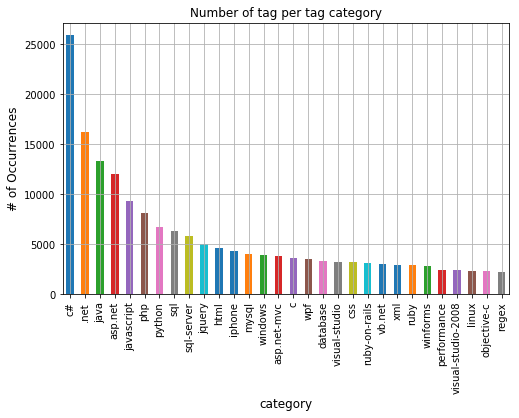

In [66]:
df_stats.plot(x='tag_name', y='Nber', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of tag per tag category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)

In [67]:
tag_nb=pd.DataFrame({'Nber':df2['Tags_word_count'].value_counts(sort=False),'Nber_of_tab':[1,2,3,4,5,6]},index=range(1,7))
tag_nb

Nber  Nber_of_tab
1  20867            1
2  51157            2
3  57984            3
4  37318            4
5  18153            5
6     10            6

Text(0.5,0,'# of Tags')

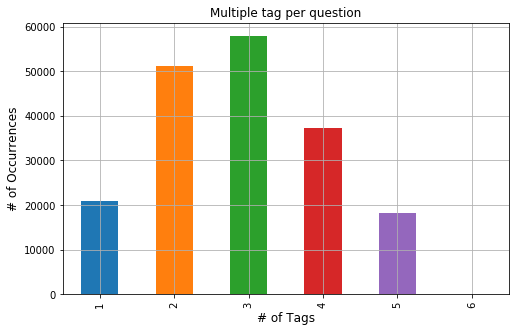

In [68]:
#graph to see multiple tags in a question
tag_nb.plot(x='Nber_of_tab', y='Nber', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Multiple tag per question")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of Tags', fontsize=12)

In [69]:
tags_df.head()

tag_name   Nber    tag_name_2
0          c#  25898          <c#>
1        .net  16257        <.net>
2        java  13332        <java>
3     asp.net  12050     <asp.net>
4  javascript   9309  <javascript>

In [71]:
# Number of tags with occurence egal or greater than 100
print('the number of which which occurence are greater than or egale is ',
      tags_df[tags_df['Nber']>=100].shape[0], 'which represent ', 
      tags_df[tags_df['Nber']>=100].shape[0]/tags_df.shape[0]*100,'% of the global number of tags')

the number of which which occurence are greater than or egale is  707 which represent  4.745603436702913 % of the global number of tags


In [72]:
bad_tags

['<blitz++>',
 '<borland-c++>',
 '<c++-cli>',
 '<c++-concepts>',
 '<c++-faq>',
 '<c++-standard-library>',
 '<c++03>',
 '<c++11>',
 '<c++17>',
 '<c++>',
 '<c++builder-2007>',
 '<c++builder-2009>',
 '<c++builder-5>',
 '<c++builder-6>',
 '<c++builder>',
 '<crypto++>',
 '<dev-c++>',
 '<effective-c++>',
 '<g++>',
 '<lapack++>',
 '<lazy-c++>',
 '<libstdc++>',
 '<magick++>',
 '<managed-c++>',
 '<mysql++>',
 '<notepad++>',
 '<objective-c++>',
 '<spy++>',
 '<tinyxml++>',
 '<turbo-c++>',
 '<visual-c++-2005>',
 '<visual-c++-2008-express>',
 '<visual-c++-2008>',
 '<visual-c++-2010>',
 '<visual-c++>',
 '<x++>']

In [97]:
bad_df=pd.DataFrame(bad_tags,columns=['tag_name_'],index=range(0,len(bad_tags)))
bad_df['Nber_2']=0
bad_df.head()

tag_name_  Nber_2
0       <blitz++>       0
1   <borland-c++>       0
2       <c++-cli>       0
3  <c++-concepts>       0
4       <c++-faq>       0

In [75]:
tags_df.to_csv('tab_tags.csv')

In [99]:
bad_df['tags']=bad_df['tag_name_']
bad_df.head()

tag_name_  Nber_2            tags
0       <blitz++>       0       <blitz++>
1   <borland-c++>       0   <borland-c++>
2       <c++-cli>       0       <c++-cli>
3  <c++-concepts>       0  <c++-concepts>
4       <c++-faq>       0       <c++-faq>

In [101]:
tic()
for a in range(0,bad_df.shape[0]):
    bad_df['tags'][a] = re.sub(re.escape('++'), 'plus', bad_df['tags'][a])
tac()

Time passed: 0hour:0min:2sec


In [105]:
df1['Tags_plus']=df1['Tags']

In [106]:
tic()
for a in range(0,df1.shape[0]):
    df1['Tags_plus'][a] = re.sub(re.escape('++'), 'plus', df1['Tags_plus'][a])
tac()

Time passed: 1hour:48min:21sec


In [107]:
df1.to_csv('StackOverflow_2.csv')

In [110]:
tic()
for i in range(0,bad_df.shape[0]):
    bad_df['Nber_2'][i]=df1.Tags_plus.str.count(bad_df['tags'][i]).sum()
tac()

Time passed: 0hour:0min:6sec


In [111]:
bad_df.head()

tag_name_  Nber_2              tags
0       <blitz++>       1       <blitzplus>
1   <borland-c++>       8   <borland-cplus>
2       <c++-cli>     164       <cplus-cli>
3  <c++-concepts>       1  <cplus-concepts>
4       <c++-faq>      39       <cplus-faq>

In [112]:
bad_df=bad_df.sort_values(by=['Nber_2'],ascending=False)
bad_df=bad_df.reset_index(drop=True)

In [113]:
bad_df.head(10)

tag_name_  Nber_2                 tags
0              <c++>    9200              <cplus>
1       <visual-c++>     744       <visual-cplus>
2          <c++-cli>     164          <cplus-cli>
3              <g++>      95              <gplus>
4       <c++builder>      91       <cplusbuilder>
5            <c++11>      54            <cplus11>
6      <managed-c++>      48      <managed-cplus>
7        <notepad++>      44        <notepadplus>
8          <c++-faq>      39          <cplus-faq>
9  <visual-c++-2005>      28  <visual-cplus-2005>

In [114]:
bad_df.tail(10)

tag_name_  Nber_2                 tags
26  <visual-c++-2010>       1  <visual-cplus-2010>
27     <c++-concepts>       1     <cplus-concepts>
28            <c++17>       1            <cplus17>
29        <tinyxml++>       1        <tinyxmlplus>
30     <c++builder-5>       1     <cplusbuilder-5>
31         <magick++>       1         <magickplus>
32         <lapack++>       1         <lapackplus>
33    <effective-c++>       1    <effective-cplus>
34     <c++builder-6>       1     <cplusbuilder-6>
35          <blitz++>       1          <blitzplus>

In [115]:
bad_df.to_csv('additional_tags.csv')

In [118]:
a=bad_df.set_index('tag_name_')
a.head()

Nber_2            tags
tag_name_                           
<c++>           9200         <cplus>
<visual-c++>     744  <visual-cplus>
<c++-cli>        164     <cplus-cli>
<g++>             95         <gplus>
<c++builder>      91  <cplusbuilder>

In [119]:
b=tags_df.set_index('tag_name_2')
b.head()

Unnamed: 0    tag_name   Nber
tag_name_2                                 
<c#>                   0          c#  25898
<.net>                 1        .net  16257
<java>                 2        java  13332
<asp.net>              3     asp.net  12050
<javascript>           4  javascript   9309

In [120]:
a.rename(columns={'Nber_2':'Nber'},inplace=True)
a.head()

Nber            tags
tag_name_                         
<c++>         9200         <cplus>
<visual-c++>   744  <visual-cplus>
<c++-cli>      164     <cplus-cli>
<g++>           95         <gplus>
<c++builder>    91  <cplusbuilder>

In [124]:
b.update(a)

In [128]:
b['Nber']['<visual-c++>']

744.0

In [129]:
b=b.sort_values(by=['Nber'],ascending=False)
b=b.reset_index()
b=b.drop(['Unnamed: 0'],axis=1)
b.head()

tag_name_2    tag_name     Nber
0          <c#>          c#  25898.0
1        <.net>        .net  16257.0
2        <java>        java  13332.0
3     <asp.net>     asp.net  12050.0
4  <javascript>  javascript   9309.0

In [130]:
b.head(10)

tag_name_2    tag_name     Nber
0          <c#>          c#  25898.0
1        <.net>        .net  16257.0
2        <java>        java  13332.0
3     <asp.net>     asp.net  12050.0
4  <javascript>  javascript   9309.0
5         <c++>         c++   9200.0
6         <php>         php   8105.0
7      <python>      python   6778.0
8         <sql>         sql   6325.0
9  <sql-server>  sql-server   5843.0

In [132]:
b['Nber']=b['Nber'].astype('int32')
b.head()

tag_name_2    tag_name   Nber
0          <c#>          c#  25898
1        <.net>        .net  16257
2        <java>        java  13332
3     <asp.net>     asp.net  12050
4  <javascript>  javascript   9309

In [133]:
b.to_csv('tags_final.csv')

Text(0.5,0,'category')

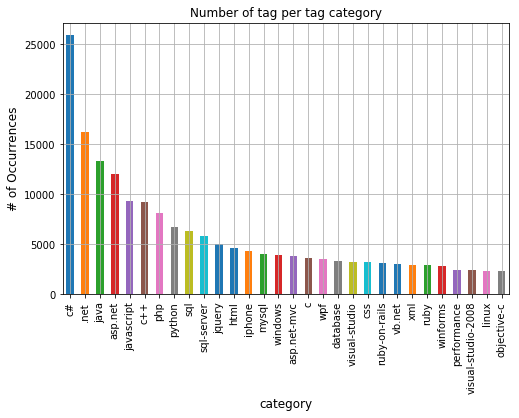

In [134]:
b.head(30).plot(x='tag_name', y='Nber', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of tag per tag category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)

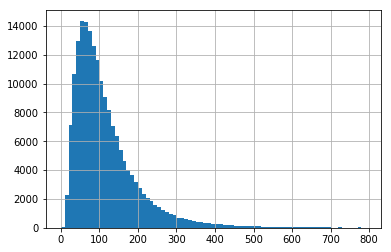

In [139]:
lens=df1['Title_body'].apply(lambda x: len(str(x).split(" ")))
lens.hist(bins = np.arange(0,800,10))

In [3]:
df1=pd.read_csv("StackOverflow_2.csv")
b=pd.read_csv("tags_final.csv")

In [4]:
text= " ".join(tag for tag in df1.Tags_)
print ("There are {} Question tag in the combination of all tags.".format(len(text)))

There are 4655982 Question tag in the combination of all tags.


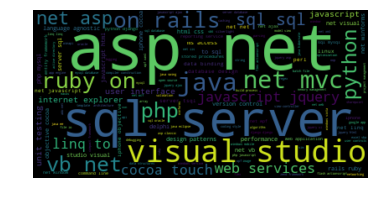

In [5]:
wordcloud = WordCloud(stopwords='generate_from_frequencies').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
def clean(text):
    letters_only = re.sub("[^a-zA-Z]", " ", text) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(meaningful_words)

In [7]:
#sample
tic()
df1['clean_word']=df1['Title_body'].apply(lambda x:clean(str(x)))
tac()

Time passed: 0hour:1min:0sec


In [8]:
top_tags_df=b[b['Nber']>999]
top_tags_df.reset_index(drop=True)
top_tags_df=top_tags_df.drop(['Unnamed: 0'],axis=1)
top_tags_df.head()

tag_name_2    tag_name   Nber
0          <c#>          c#  25898
1        <.net>        .net  16257
2        <java>        java  13332
3     <asp.net>     asp.net  12050
4  <javascript>  javascript   9309

In [9]:
del_tags=b[b['Nber']<1000]
del_tags=del_tags.reset_index(drop=True)
del_tags=del_tags.drop(['Unnamed: 0'],axis=1)
del_tags.head()

tag_name_2   tag_name  Nber
0   <generics>   generics   998
1      <image>      image   990
2       <file>       file   989
3  <exception>  exception   966
4       <http>       http   925

In [10]:
df1['Tags_final']=df1['Tags_plus']

In [11]:
a=pd.read_csv('additional_tags.csv')
a=a.drop(['Unnamed: 0'],axis=1)
a=a.set_index(['tag_name_'])
a.head()

Nber_2            tags
tag_name_                           
<c++>           9200         <cplus>
<visual-c++>     744  <visual-cplus>
<c++-cli>        164     <cplus-cli>
<g++>             95         <gplus>
<c++builder>      91  <cplusbuilder>

In [12]:
b['tags']=b['tag_name_2']
b=b.set_index(['tag_name_2'])
b.head()

Unnamed: 0    tag_name   Nber          tags
tag_name_2                                               
<c#>                   0          c#  25898          <c#>
<.net>                 1        .net  16257        <.net>
<java>                 2        java  13332        <java>
<asp.net>              3     asp.net  12050     <asp.net>
<javascript>           4  javascript   9309  <javascript>

In [13]:
b.update(a)
b.head(10)

Unnamed: 0    tag_name   Nber          tags
tag_name_2                                               
<c#>                   0          c#  25898          <c#>
<.net>                 1        .net  16257        <.net>
<java>                 2        java  13332        <java>
<asp.net>              3     asp.net  12050     <asp.net>
<javascript>           4  javascript   9309  <javascript>
<c++>                  5         c++   9200       <cplus>
<php>                  6         php   8105         <php>
<python>               7      python   6778      <python>
<sql>                  8         sql   6325         <sql>
<sql-server>           9  sql-server   5843  <sql-server>

In [14]:
b=b.reset_index()
b.head()

tag_name_2  Unnamed: 0    tag_name   Nber          tags
0          <c#>           0          c#  25898          <c#>
1        <.net>           1        .net  16257        <.net>
2        <java>           2        java  13332        <java>
3     <asp.net>           3     asp.net  12050     <asp.net>
4  <javascript>           4  javascript   9309  <javascript>

In [15]:
del_tags=b[b['Nber']<1000]
del_tags=del_tags.reset_index(drop=True)
del_tags.head()

tag_name_2  Unnamed: 0   tag_name  Nber         tags
0   <generics>          71   generics   998   <generics>
1      <image>          72      image   990      <image>
2       <file>          73       file   989       <file>
3  <exception>          74  exception   966  <exception>
4       <http>          75       http   925       <http>

In [17]:
s = df1['Tags_'].str.split(' ').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name='Tags_f'
df2=df1.join(s)
df2.head()

Unnamed: 0  Id         CreationDate  Score  \
0           0   4  2008-07-31 21:42:52    570   
0           0   4  2008-07-31 21:42:52    570   
0           0   4  2008-07-31 21:42:52    570   
0           0   4  2008-07-31 21:42:52    570   
0           0   4  2008-07-31 21:42:52    570   

                                                Body  \
0  <p>I want to use a track-bar to change a form'...   
0  <p>I want to use a track-bar to change a form'...   
0  <p>I want to use a track-bar to change a form'...   
0  <p>I want to use a track-bar to change a form'...   
0  <p>I want to use a track-bar to change a form'...   

                        Title  \
0  Convert Decimal to Double?   
0  Convert Decimal to Double?   
0  Convert Decimal to Double?   
0  Convert Decimal to Double?   
0  Convert Decimal to Double?   

                                                Tags  \
0  <c#><floating-point><type-conversion><double><...   
0  <c#><floating-point><type-conversion><double><...   
0  <c#><floating-point><type-conversion><double><...   
0  <c#><floating-point><type-conversion><double><...   
0  <c#><floating-point><type-conversion><double><...   

                                          Body_whtml  \
0  I want to use a track-bar to change a form's o...   
0  I want to use a track-bar to change a form's o...   
0  I want to use a track-bar to change a form's o...   
0  I want to use a track-bar to change a form's o...   
0  I want to use a track-bar to change a form's o...   

                                              Tags_  Body_word_count  \
0  c# floating-point type-conversion double decimal             57.0   
0  c# floating-point type-conversion double decimal             57.0   
0  c# floating-point type-conversion double decimal             57.0   
0  c# floating-point type-conversion double decimal             57.0   
0  c# floating-point type-conversion double decimal             57.0   

   Title_word_count  Tags_word_count  \
0               4.0              5.0   
0               4.0              5.0   
0               4.0              5.0   
0               4.0              5.0   
0               4.0              5.0   

                                          Title_body  \
0  Convert Decimal to Double? I want to use a tra...   
0  Convert Decimal to Double? I want to use a tra...   
0  Convert Decimal to Double? I want to use a tra...   
0  Convert Decimal to Double? I want to use a tra...   
0  Convert Decimal to Double? I want to use a tra...   

                                           Tags_plus  \
0  <c#><floating-point><type-conversion><double><...   
0  <c#><floating-point><type-conversion><double><...   
0  <c#><floating-point><type-conversion><double><...   
0  <c#><floating-point><type-conversion><double><...   
0  <c#><floating-point><type-conversion><double><...   

                                          clean_word  \
0  [convert, decimal, double, want, use, track, b...   
0  [convert, decimal, double, want, use, track, b...   
0  [convert, decimal, double, want, use, track, b...   
0  [convert, decimal, double, want, use, track, b...   
0  [convert, decimal, double, want, use, track, b...   

                                          Tags_final           Tags_f  
0  <c#><floating-point><type-conversion><double><...               c#  
0  <c#><floating-point><type-conversion><double><...   floating-point  
0  <c#><floating-point><type-conversion><double><...  type-conversion  
0  <c#><floating-point><type-conversion><double><...           double  
0  <c#><floating-point><type-conversion><double><...          decimal

In [18]:
Top_tags=b[b['Nber']>999]
Top_tags=Top_tags.reset_index(drop=True)
len(Top_tags)
Top_tags.head()

tag_name_2  Unnamed: 0    tag_name   Nber          tags
0          <c#>           0          c#  25898          <c#>
1        <.net>           1        .net  16257        <.net>
2        <java>           2        java  13332        <java>
3     <asp.net>           3     asp.net  12050     <asp.net>
4  <javascript>           4  javascript   9309  <javascript>

In [19]:
len(Top_tags)

71

In [20]:
df2['Tags_fin']="<"+df2['Tags_f']+">"

In [21]:
df2.head()

Unnamed: 0  Id         CreationDate  Score  \
0           0   4  2008-07-31 21:42:52    570   
0           0   4  2008-07-31 21:42:52    570   
0           0   4  2008-07-31 21:42:52    570   
0           0   4  2008-07-31 21:42:52    570   
0           0   4  2008-07-31 21:42:52    570   

                                                Body  \
0  <p>I want to use a track-bar to change a form'...   
0  <p>I want to use a track-bar to change a form'...   
0  <p>I want to use a track-bar to change a form'...   
0  <p>I want to use a track-bar to change a form'...   
0  <p>I want to use a track-bar to change a form'...   

                        Title  \
0  Convert Decimal to Double?   
0  Convert Decimal to Double?   
0  Convert Decimal to Double?   
0  Convert Decimal to Double?   
0  Convert Decimal to Double?   

                                                Tags  \
0  <c#><floating-point><type-conversion><double><...   
0  <c#><floating-point><type-conversion><double><...   
0  <c#><floating-point><type-conversion><double><...   
0  <c#><floating-point><type-conversion><double><...   
0  <c#><floating-point><type-conversion><double><...   

                                          Body_whtml  \
0  I want to use a track-bar to change a form's o...   
0  I want to use a track-bar to change a form's o...   
0  I want to use a track-bar to change a form's o...   
0  I want to use a track-bar to change a form's o...   
0  I want to use a track-bar to change a form's o...   

                                              Tags_  Body_word_count  \
0  c# floating-point type-conversion double decimal             57.0   
0  c# floating-point type-conversion double decimal             57.0   
0  c# floating-point type-conversion double decimal             57.0   
0  c# floating-point type-conversion double decimal             57.0   
0  c# floating-point type-conversion double decimal             57.0   

   Title_word_count  Tags_word_count  \
0               4.0              5.0   
0               4.0              5.0   
0               4.0              5.0   
0               4.0              5.0   
0               4.0              5.0   

                                          Title_body  \
0  Convert Decimal to Double? I want to use a tra...   
0  Convert Decimal to Double? I want to use a tra...   
0  Convert Decimal to Double? I want to use a tra...   
0  Convert Decimal to Double? I want to use a tra...   
0  Convert Decimal to Double? I want to use a tra...   

                                           Tags_plus  \
0  <c#><floating-point><type-conversion><double><...   
0  <c#><floating-point><type-conversion><double><...   
0  <c#><floating-point><type-conversion><double><...   
0  <c#><floating-point><type-conversion><double><...   
0  <c#><floating-point><type-conversion><double><...   

                                          clean_word  \
0  [convert, decimal, double, want, use, track, b...   
0  [convert, decimal, double, want, use, track, b...   
0  [convert, decimal, double, want, use, track, b...   
0  [convert, decimal, double, want, use, track, b...   
0  [convert, decimal, double, want, use, track, b...   

                                          Tags_final           Tags_f  \
0  <c#><floating-point><type-conversion><double><...               c#   
0  <c#><floating-point><type-conversion><double><...   floating-point   
0  <c#><floating-point><type-conversion><double><...  type-conversion   
0  <c#><floating-point><type-conversion><double><...           double   
0  <c#><floating-point><type-conversion><double><...          decimal   

            Tags_fin  
0               <c#>  
0   <floating-point>  
0  <type-conversion>  
0           <double>  
0          <decimal>

In [22]:
df3=df2[df2['Tags_fin'].isin(Top_tags['tag_name_2'].tolist())]

In [23]:
df3.head()

Unnamed: 0  Id         CreationDate  Score  \
0           0   4  2008-07-31 21:42:52    570   
1           1   6  2008-07-31 22:08:08    256   
1           1   6  2008-07-31 22:08:08    256   
2           2   9  2008-07-31 23:40:59   1743   
2           2   9  2008-07-31 23:40:59   1743   

                                                Body  \
0  <p>I want to use a track-bar to change a form'...   
1  <p>I have an absolutely positioned <code>div</...   
1  <p>I have an absolutely positioned <code>div</...   
2  <p>Given a <code>DateTime</code> representing ...   
2  <p>Given a <code>DateTime</code> representing ...   

                                               Title  \
0                         Convert Decimal to Double?   
1  Percentage width child element in absolutely p...   
1  Percentage width child element in absolutely p...   
2            How do I calculate someone's age in C#?   
2            How do I calculate someone's age in C#?   

                                                Tags  \
0  <c#><floating-point><type-conversion><double><...   
1             <html><css><css3><internet-explorer-7>   
1             <html><css><css3><internet-explorer-7>   
2                               <c#><.net><datetime>   
2                               <c#><.net><datetime>   

                                          Body_whtml  \
0  I want to use a track-bar to change a form's o...   
1  I have an absolutely positioned div containing...   
1  I have an absolutely positioned div containing...   
2  Given a DateTime representing a person's birth...   
2  Given a DateTime representing a person's birth...   

                                              Tags_  Body_word_count  \
0  c# floating-point type-conversion double decimal             57.0   
1                 html css css3 internet-explorer-7             86.0   
1                 html css css3 internet-explorer-7             86.0   
2                                  c# .net datetime             16.0   
2                                  c# .net datetime             16.0   

   Title_word_count  Tags_word_count  \
0               4.0              5.0   
1              12.0              4.0   
1              12.0              4.0   
2               8.0              3.0   
2               8.0              3.0   

                                          Title_body  \
0  Convert Decimal to Double? I want to use a tra...   
1  Percentage width child element in absolutely p...   
1  Percentage width child element in absolutely p...   
2  How do I calculate someone's age in C#? Given ...   
2  How do I calculate someone's age in C#? Given ...   

                                           Tags_plus  \
0  <c#><floating-point><type-conversion><double><...   
1             <html><css><css3><internet-explorer-7>   
1             <html><css><css3><internet-explorer-7>   
2                               <c#><.net><datetime>   
2                               <c#><.net><datetime>   

                                          clean_word  \
0  [convert, decimal, double, want, use, track, b...   
1  [percentage, width, child, element, absolutely...   
1  [percentage, width, child, element, absolutely...   
2  [calculate, someone, age, c, given, datetime, ...   
2  [calculate, someone, age, c, given, datetime, ...   

                                          Tags_final Tags_f Tags_fin  
0  <c#><floating-point><type-conversion><double><...     c#     <c#>  
1             <html><css><css3><internet-explorer-7>   html   <html>  
1             <html><css><css3><internet-explorer-7>    css    <css>  
2                               <c#><.net><datetime>     c#     <c#>  
2                               <c#><.net><datetime>   .net   <.net>

In [24]:
len(df3['Tags_fin'].unique())

71

In [25]:
df4=pd.concat([df3['Id'],pd.get_dummies(df3['Tags_f'])],axis=1)
df4.head()

Id  .net  actionscript-3  ajax  algorithm  apache  arrays  asp.net  \
0   4     0               0     0          0       0       0        0   
1   6     0               0     0          0       0       0        0   
1   6     0               0     0          0       0       0        0   
2   9     0               0     0          0       0       0        0   
2   9     1               0     0          0       0       0        0   

   asp.net-mvc  c ...   version-control  visual-studio  visual-studio-2008  \
0            0  0 ...                 0              0                   0   
1            0  0 ...                 0              0                   0   
1            0  0 ...                 0              0                   0   
2            0  0 ...                 0              0                   0   
2            0  0 ...                 0              0                   0   

   wcf  web-services  winapi  windows  winforms  wpf  xml  
0    0             0       0        0         0    0    0  
1    0             0       0        0         0    0    0  
1    0             0       0        0         0    0    0  
2    0             0       0        0         0    0    0  
2    0             0       0        0         0    0    0  

[5 rows x 72 columns]

In [29]:
df5=df4.groupby(['Id']).sum()
df5['Tags_total']=df5.sum(axis=1)
df5.head()

.net  actionscript-3  ajax  algorithm  apache  arrays  asp.net  \
Id                                                                   
4      0               0     0          0       0       0        0   
6      0               0     0          0       0       0        0   
9      1               0     0          0       0       0        0   
11     0               0     0          0       0       0        0   
13     0               0     0          0       0       0        0   

    asp.net-mvc  c  c#     ...      visual-studio  visual-studio-2008  wcf  \
Id                         ...                                               
4             0  0   1     ...                  0                   0    0   
6             0  0   0     ...                  0                   0    0   
9             0  0   1     ...                  0                   0    0   
11            0  0   1     ...                  0                   0    0   
13            0  0   0     ...                  0                   0    0   

    web-services  winapi  windows  winforms  wpf  xml  Tags_total  
Id                                                                 
4              0       0        0         0    0    0           1  
6              0       0        0         0    0    0           2  
9              0       0        0         0    0    0           2  
11             0       0        0         0    0    0           1  
13             0       0        0         0    0    0           2  

[5 rows x 72 columns]

In [33]:
df5=df5.reset_index()
df6=df1[df1['Id'].isin(df5['Id'].tolist())]
df6=df6.set_index(['Id'])
df5=df5.set_index(['Id'])
df7=pd.concat([df6,df5],axis=1)
df7.shape

(154806, 87)

In [34]:
df7.head()

Unnamed: 0         CreationDate  Score  \
Id                                           
4            0  2008-07-31 21:42:52    570   
6            1  2008-07-31 22:08:08    256   
9            2  2008-07-31 23:40:59   1743   
11           3  2008-07-31 23:55:37   1347   
13           4  2008-08-01 00:42:38    539   

                                                 Body  \
Id                                                      
4   <p>I want to use a track-bar to change a form'...   
6   <p>I have an absolutely positioned <code>div</...   
9   <p>Given a <code>DateTime</code> representing ...   
11  <p>Given a specific <code>DateTime</code> valu...   
13  <p>Is there any standard way for a Web Server ...   

                                                Title  \
Id                                                      
4                          Convert Decimal to Double?   
6   Percentage width child element in absolutely p...   
9             How do I calculate someone's age in C#?   
11                      Calculate relative time in C#   
13                        Determine a User's Timezone   

                                                 Tags  \
Id                                                      
4   <c#><floating-point><type-conversion><double><...   
6              <html><css><css3><internet-explorer-7>   
9                                <c#><.net><datetime>   
11  <c#><datetime><time><datediff><relative-time-s...   
13  <javascript><html><browser><timezone><timezone...   

                                           Body_whtml  \
Id                                                      
4   I want to use a track-bar to change a form's o...   
6   I have an absolutely positioned div containing...   
9   Given a DateTime representing a person's birth...   
11  Given a specific DateTime value, how do I disp...   
13  Is there any standard way for a Web Server to ...   

                                               Tags_  Body_word_count  \
Id                                                                      
4   c# floating-point type-conversion double decimal             57.0   
6                  html css css3 internet-explorer-7             86.0   
9                                   c# .net datetime             16.0   
11      c# datetime time datediff relative-time-span             18.0   
13   javascript html browser timezone timezoneoffset             32.0   

    Title_word_count     ...      visual-studio visual-studio-2008 wcf  \
Id                       ...                                             
4                4.0     ...                  0                  0   0   
6               12.0     ...                  0                  0   0   
9                8.0     ...                  0                  0   0   
11               5.0     ...                  0                  0   0   
13               4.0     ...                  0                  0   0   

   web-services winapi  windows  winforms  wpf  xml  Tags_total  
Id                                                               
4             0      0        0         0    0    0           1  
6             0      0        0         0    0    0           2  
9             0      0        0         0    0    0           2  
11            0      0        0         0    0    0           1  
13            0      0        0         0    0    0           2  

[5 rows x 87 columns]

In [35]:
df7=df7.drop(['Unnamed: 0'],axis=1)
df7=df7.reset_index()
df7.to_csv('StaackOverflow_model.csv')

In [36]:
df5['Tags_total'].value_counts()

1    86589
2    51159
3    14429
4     2416
5      213
Name: Tags_total, dtype: int64

In [40]:
tag_nb=pd.DataFrame({'Nber':df5['Tags_total'].value_counts(sort=False)/df5.shape[0]*100,
                     'Nber_of_tab':[1,2,3,4,5]},index=range(1,6))
tag_nb

Nber  Nber_of_tab
1  55.933879            1
2  33.047169            2
3   9.320698            3
4   1.560663            4
5   0.137592            5

Text(0.5,0,'# of Tags')

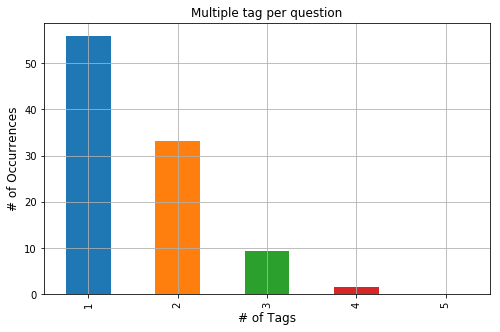

In [41]:
tag_nb.plot(x='Nber_of_tab', y='Nber', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Multiple tag per question")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of Tags', fontsize=12)

In [58]:
df7.columns

Index(['Id', 'CreationDate', 'Score', 'Body', 'Title', 'Tags', 'Body_whtml',
       'Tags_', 'Body_word_count', 'Title_word_count', 'Tags_word_count',
       'Title_body', 'Tags_plus', 'clean_word', 'Tags_final', '.net',
       'actionscript-3', 'ajax', 'algorithm', 'apache', 'arrays', 'asp.net',
       'asp.net-mvc', 'c', 'c#', 'c++', 'cocoa', 'cocoa-touch', 'css',
       'database', 'debugging', 'delphi', 'design', 'design-patterns',
       'django', 'eclipse', 'excel', 'flash', 'flex', 'html', 'iis',
       'internet-explorer', 'iphone', 'java', 'javascript', 'jquery',
       'language-agnostic', 'linq', 'linq-to-sql', 'linux', 'macos',
       'multithreading', 'mysql', 'nhibernate', 'objective-c', 'oop', 'oracle',
       'performance', 'perl', 'php', 'python', 'regex', 'ruby',
       'ruby-on-rails', 'security', 'sharepoint', 'silverlight', 'sql',
       'sql-server', 'sql-server-2005', 'string', 'svn', 'tsql',
       'unit-testing', 'user-interface', 'vb.net', 'version-control',
 

In [60]:
tic()
df7['clean_body']=df7['Title_body'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df7['clean_body']=df7['clean_body'].str.replace('[^\w\s]','')
stop = stopwords.words('english')
df7['clean_body'] = df7['clean_body'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
tac()

Time passed: 0hour:0min:51sec


In [61]:
df7['clean_body'].head()

0    convert decimal double want use trackbar chang...
1    percentage width child element absolutely posi...
2    calculate someones age c given datetime repres...
3    calculate relative time c given specific datet...
4    determine users timezone standard way web serv...
Name: clean_body, dtype: object

In [62]:
Top_tags

tag_name_2  Unnamed: 0            tag_name   Nber  \
0                   <c#>           0                  c#  25898   
1                 <.net>           1                .net  16257   
2                 <java>           2                java  13332   
3              <asp.net>           3             asp.net  12050   
4           <javascript>           4          javascript   9309   
5                  <c++>           5                 c++   9200   
6                  <php>           6                 php   8105   
7               <python>           7              python   6778   
8                  <sql>           8                 sql   6325   
9           <sql-server>           9          sql-server   5843   
10              <jquery>          10              jquery   5081   
11                <html>          11                html   4633   
12              <iphone>          12              iphone   4319   
13               <mysql>          13               mysql   4002   
14             <windows>          14             windows   3962   
15         <asp.net-mvc>          15         asp.net-mvc   3833   
16                   <c>          16                   c   3626   
17                 <wpf>          17                 wpf   3554   
18            <database>          18            database   3287   
19       <visual-studio>          19       visual-studio   3240   
20                 <css>          20                 css   3189   
21       <ruby-on-rails>          21       ruby-on-rails   3174   
22              <vb.net>          22              vb.net   3070   
23                 <xml>          23                 xml   2955   
24                <ruby>          24                ruby   2895   
25            <winforms>          25            winforms   2797   
26         <performance>          26         performance   2401   
27  <visual-studio-2008>          27  visual-studio-2008   2391   
28               <linux>          28               linux   2346   
29         <objective-c>          29         objective-c   2310   
..                   ...         ...                 ...    ...   
41                 <wcf>          41                 wcf   1663   
42                <flex>          42                flex   1653   
43              <oracle>          43              oracle   1635   
44        <unit-testing>          44        unit-testing   1620   
45               <flash>          45               flash   1597   
46          <sharepoint>          46          sharepoint   1596   
47      <user-interface>          47      user-interface   1593   
48              <delphi>          48              delphi   1587   
49                <perl>          49                perl   1548   
50              <django>          50              django   1545   
51              <winapi>          51              winapi   1461   
52           <debugging>          52           debugging   1458   
53                 <oop>          53                 oop   1455   
54               <cocoa>          54               cocoa   1413   
55   <language-agnostic>          55   language-agnostic   1413   
56         <linq-to-sql>          56         linq-to-sql   1403   
57               <macos>          57               macos   1393   
58             <eclipse>          58             eclipse   1392   
59              <design>          59              design   1345   
60         <silverlight>          60         silverlight   1305   
61              <arrays>          61              arrays   1303   
62                <tsql>          62                tsql   1255   
63      <actionscript-3>          63      actionscript-3   1231   
64     <version-control>          64     version-control   1225   
65               <excel>          65               excel   1219   
66     <design-patterns>          66     design-patterns   1158   
67          <nhibernate>          67          nhibernate   1144   
68                 <iis>          68                 iis   11

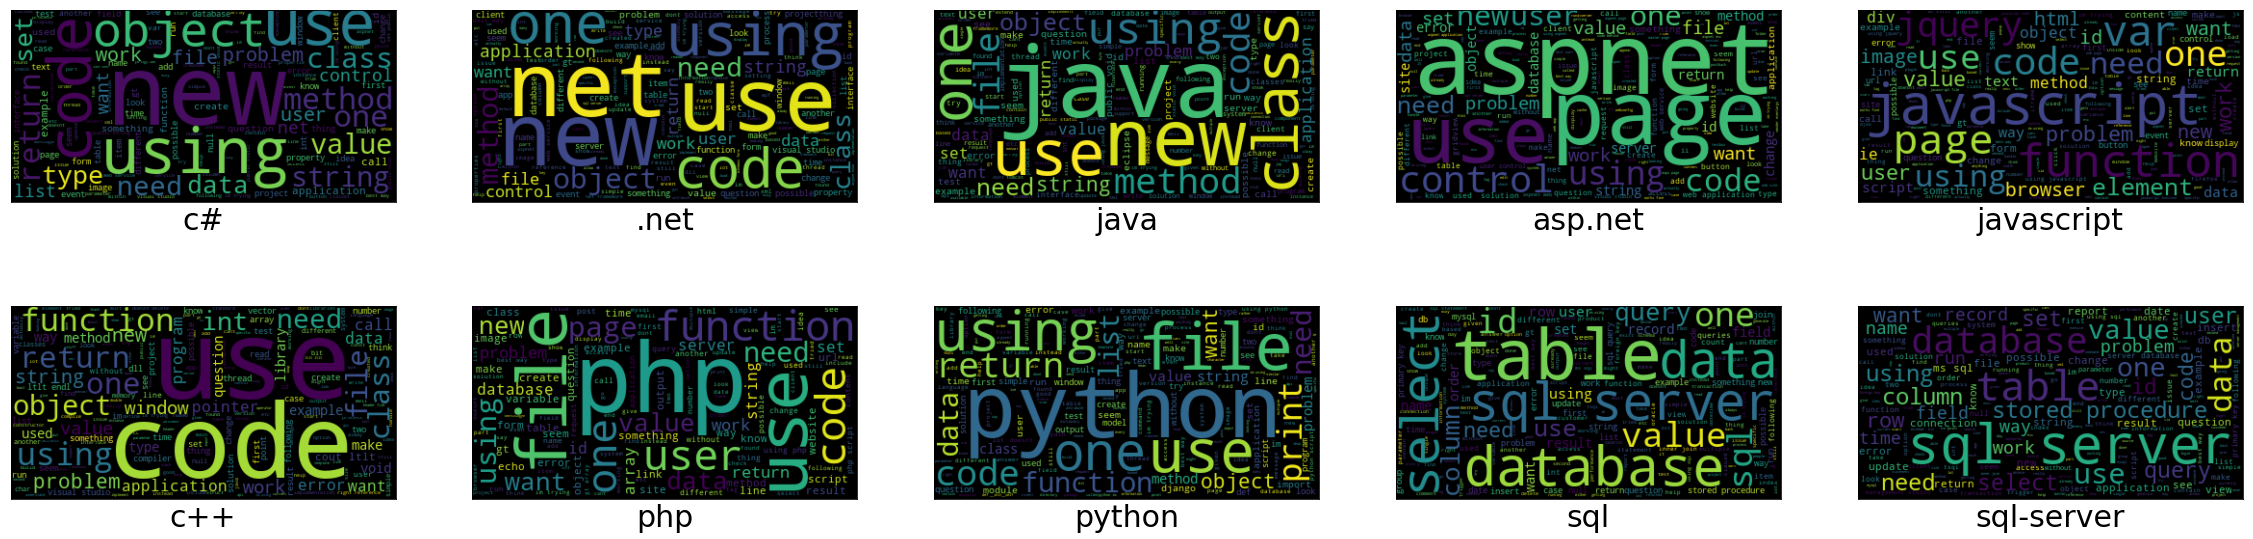

Time passed: 0hour:1min:12sec


In [80]:
tic()
Top_10=Top_tags.head(10)
tag_ff=[]
plt.figure(figsize=(40,10))
for tag in Top_10['tag_name'].tolist():
    df_tag=df7[df7[tag]==1]
    text= " ".join(tag_l for tag_l in df_tag.clean_body)
    wordcloud = WordCloud().generate(text)
    tag_ff.append(tag)
    i=len(tag_ff)
    plt.subplot(2, 5,i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(tag,fontsize=30)
plt.show()
tac()

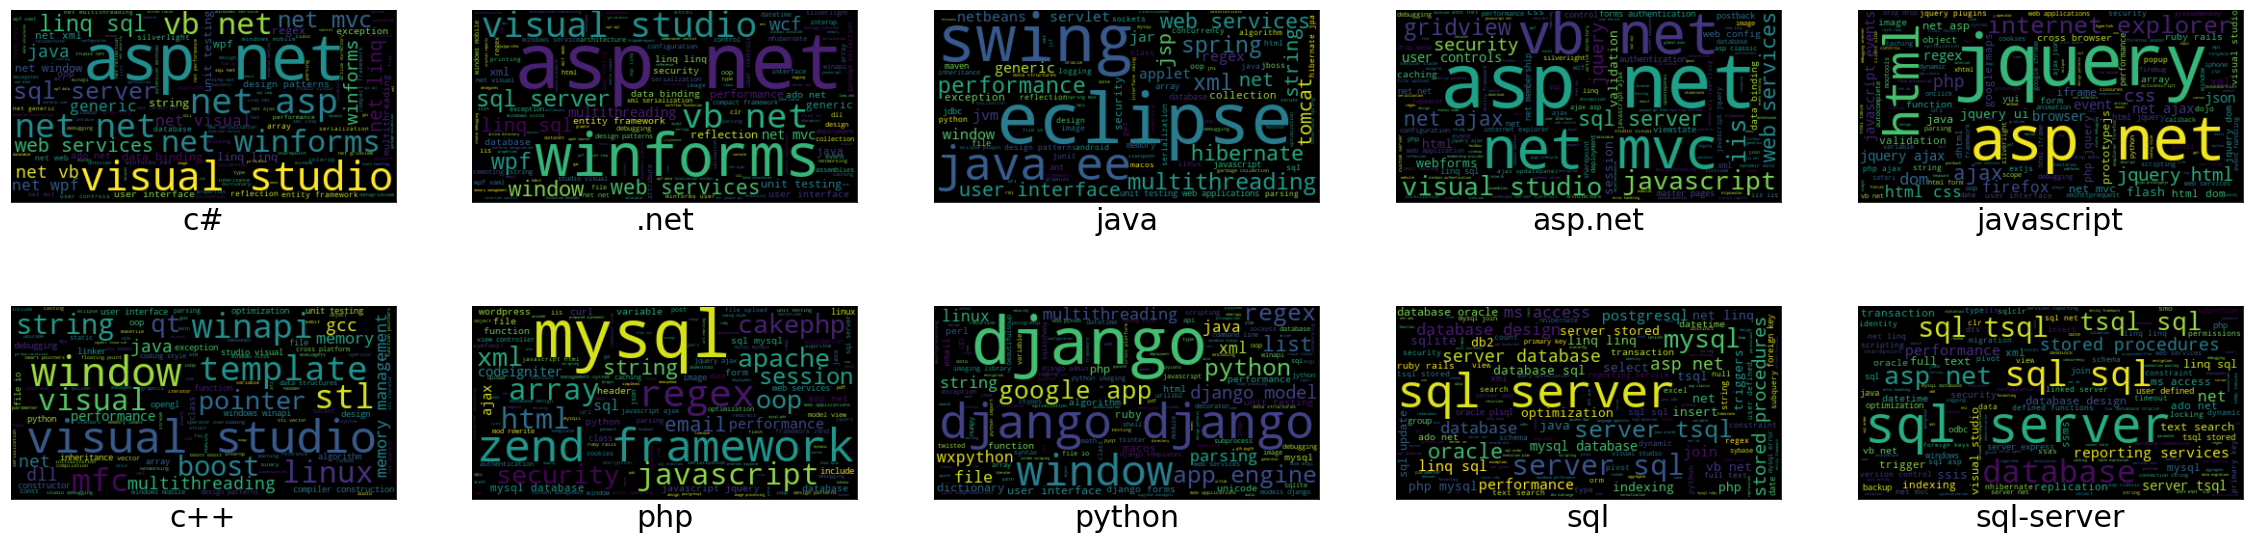

Time passed: 0hour:0min:11sec


In [85]:
tic()
Top_10=Top_tags.head(10)
tag_ff=[]
plt.figure(figsize=(40,10))
for tag in Top_10['tag_name'].tolist():
    df_tag=df7[df7[tag]==1]
    stop = set(stopwords.words('english'))
    stop.update([tag])
    df_tag['tag_2'] = df_tag['Tags_'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    text= " ".join(tag_l for tag_l in df_tag.tag_2)
    wordcloud = WordCloud().generate(text)
    tag_ff.append(tag)
    i=len(tag_ff)
    plt.subplot(2, 5,i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(tag,fontsize=30)
plt.show()
tac()

In [87]:
df7.head()

Id         CreationDate  Score  \
0   4  2008-07-31 21:42:52    570   
1   6  2008-07-31 22:08:08    256   
2   9  2008-07-31 23:40:59   1743   
3  11  2008-07-31 23:55:37   1347   
4  13  2008-08-01 00:42:38    539   

                                                Body  \
0  <p>I want to use a track-bar to change a form'...   
1  <p>I have an absolutely positioned <code>div</...   
2  <p>Given a <code>DateTime</code> representing ...   
3  <p>Given a specific <code>DateTime</code> valu...   
4  <p>Is there any standard way for a Web Server ...   

                                               Title  \
0                         Convert Decimal to Double?   
1  Percentage width child element in absolutely p...   
2            How do I calculate someone's age in C#?   
3                      Calculate relative time in C#   
4                        Determine a User's Timezone   

                                                Tags  \
0  <c#><floating-point><type-conversion><double><...   
1             <html><css><css3><internet-explorer-7>   
2                               <c#><.net><datetime>   
3  <c#><datetime><time><datediff><relative-time-s...   
4  <javascript><html><browser><timezone><timezone...   

                                          Body_whtml  \
0  I want to use a track-bar to change a form's o...   
1  I have an absolutely positioned div containing...   
2  Given a DateTime representing a person's birth...   
3  Given a specific DateTime value, how do I disp...   
4  Is there any standard way for a Web Server to ...   

                                              Tags_  Body_word_count  \
0  c# floating-point type-conversion double decimal             57.0   
1                 html css css3 internet-explorer-7             86.0   
2                                  c# .net datetime             16.0   
3      c# datetime time datediff relative-time-span             18.0   
4   javascript html browser timezone timezoneoffset             32.0   

   Title_word_count                        ...                          \
0               4.0                        ...                           
1              12.0                        ...                           
2               8.0                        ...                           
3               5.0                        ...                           
4               4.0                        ...                           

   visual-studio-2008 wcf web-services winapi windows  winforms  wpf  xml  \
0                   0   0            0      0       0         0    0    0   
1                   0   0            0      0       0         0    0    0   
2                   0   0            0      0       0         0    0    0   
3                   0   0            0      0       0         0    0    0   
4                   0   0            0      0       0         0    0    0   

   Tags_total                                         clean_body  
0           1  convert decimal double want use trackbar chang...  
1           2  percentage width child element absolutely posi...  
2           2  calculate someones age c given datetime repres...  
3           1  calculate relative time c given specific datet...  
4           2  determine users timezone standard way web serv...  

[5 rows x 88 columns]

In [88]:
freq = pd.Series(' '.join(df7['clean_body']).split()).value_counts()[:10]
freq

using    74594
like     68991
im       67964
would    61543
use      56972
code     56202
get      55374
way      55351
new      51300
want     47923
dtype: int64

In [89]:
freq = list(freq.index)
df7['clean_body'] = df7['clean_body'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [90]:
df7['clean_body'].head()

0    convert decimal double trackbar change forms o...
1    percentage width child element absolutely posi...
2    calculate someones age c given datetime repres...
3    calculate relative time c given specific datet...
4    determine users timezone standard web server a...
Name: clean_body, dtype: object

In [117]:
freq = pd.Series(' '.join(df7['clean_body']).split()).value_counts()[-10:]
freq

efdestroyworksheetws                      1
jltmatrix0length                          1
offltagtltligtthis                        1
postmessagemyprojectentitiesbetmessage    1
columnsfooter                             1
omittednote                               1
classestaskm95720090413                   1
httpossoetikerchrrdtool                   1
addcontrolstolistccontrols                1
dofollowuplots                            1
dtype: int64

In [118]:
freq = list(freq.index)
df7['clean_body'] = df7['clean_body'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df7['clean_body'].head()

0    convert decimal double trackbar change forms o...
1    percentage width child element absolutely posi...
2    calculate someones age c given datetime repres...
3    calculate relative time c given specific datet...
4    determine users timezone standard web server a...
Name: clean_body, dtype: object

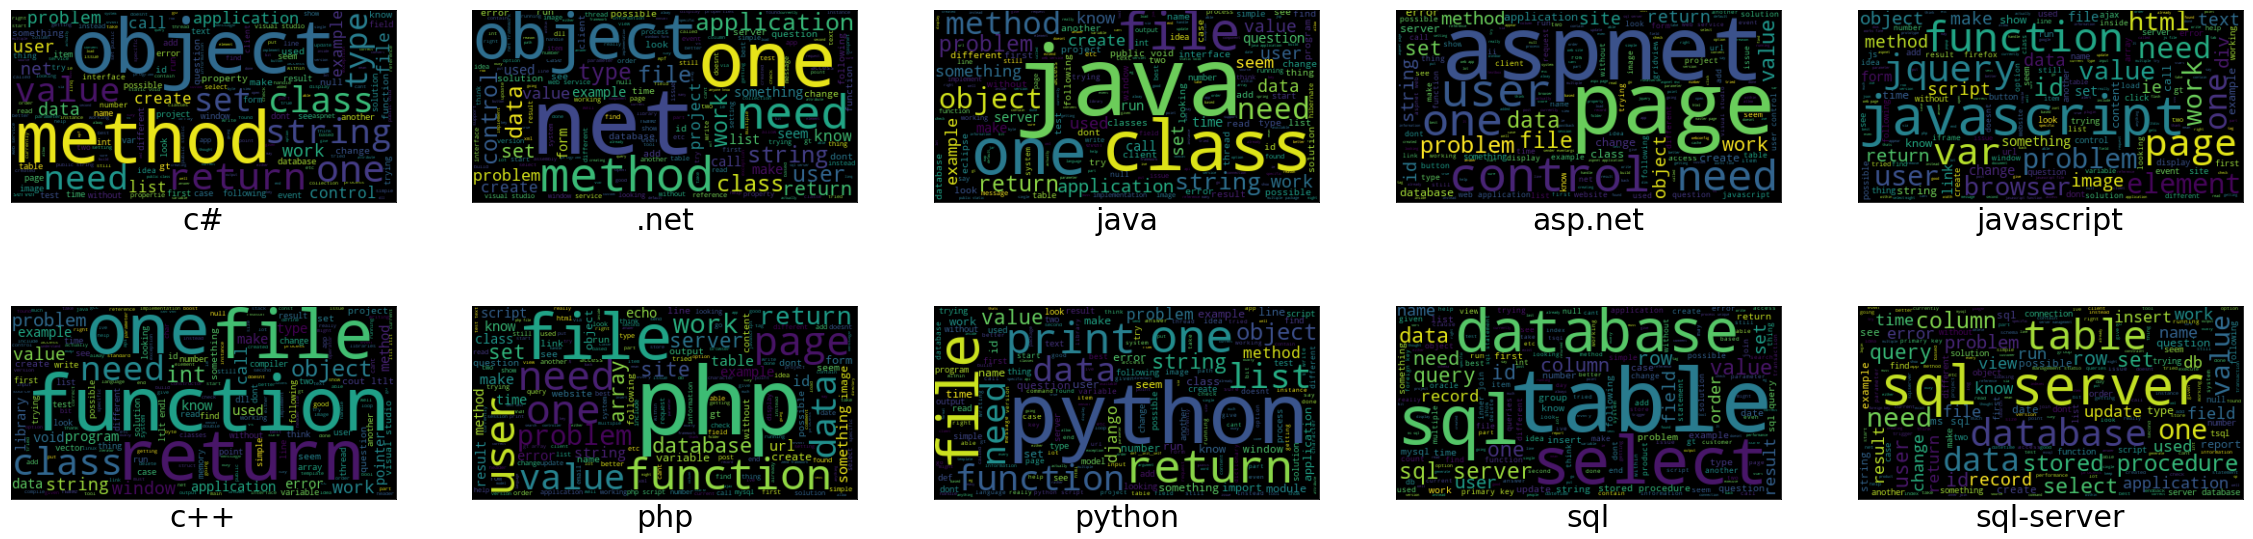

Time passed: 0hour:1min:19sec


In [119]:
tic()
Top_10=Top_tags.head(10)
tag_ff=[]
plt.figure(figsize=(40,10))
for tag in Top_10['tag_name'].tolist():
    df_tag=df7[df7[tag]==1]
    text= " ".join(tag_l for tag_l in df_tag.clean_body)
    wordcloud = WordCloud().generate(text)
    tag_ff.append(tag)
    i=len(tag_ff)
    plt.subplot(2, 5,i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(tag,fontsize=30)
plt.show()
tac()

In [121]:
df7.to_csv('StackOverflow_7.csv')

In [128]:
tic()
df7['clean_body']=df7['clean_body'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
tac()

Time passed: 0hour:1min:9sec


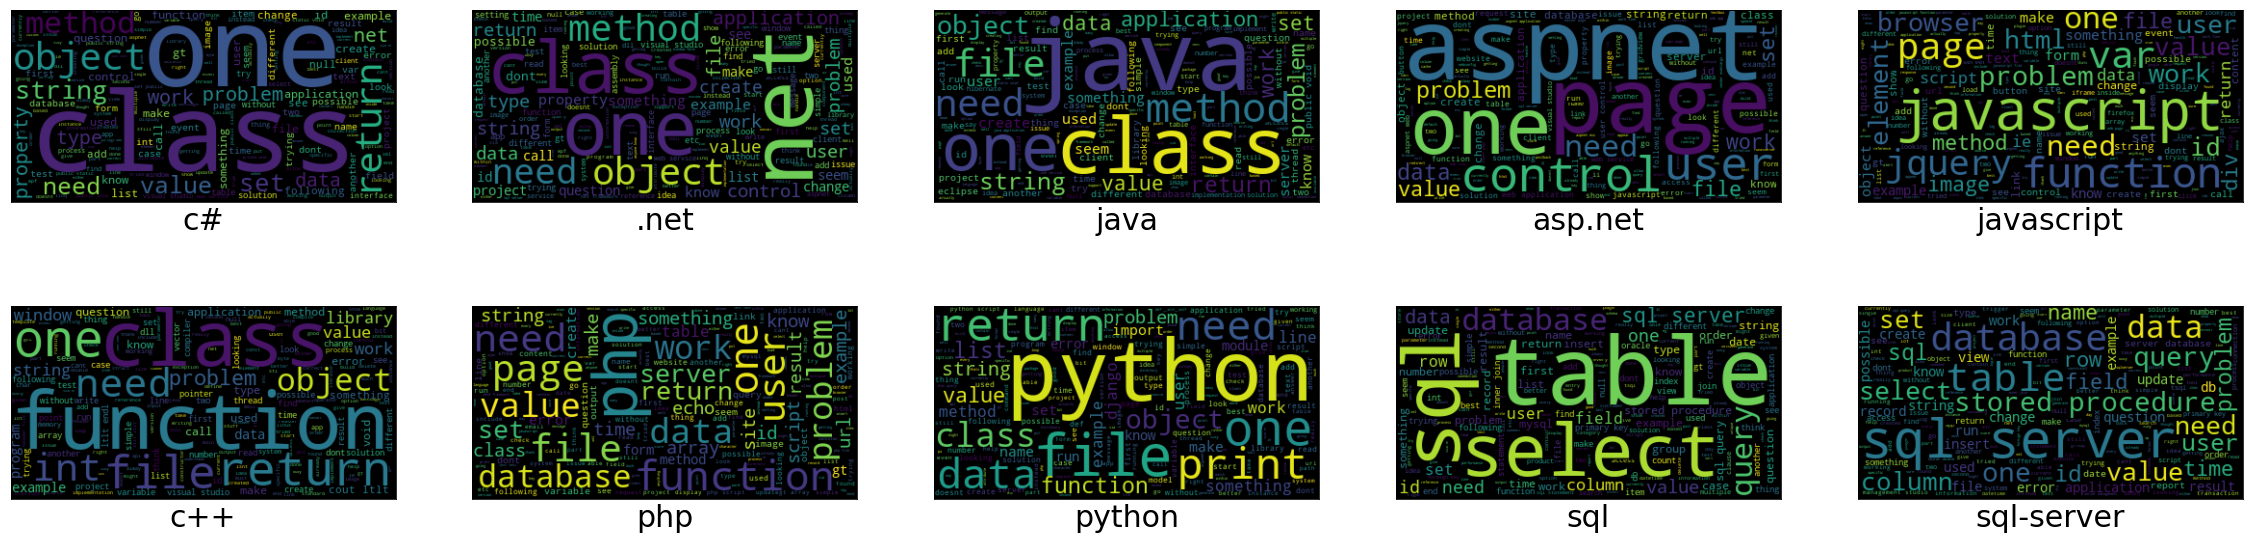

Time passed: 0hour:1min:18sec


In [130]:
tic()
Top_10=Top_tags.head(10)
tag_ff=[]
plt.figure(figsize=(40,10))
for tag in Top_10['tag_name'].tolist():
    df_tag=df7[df7[tag]==1]
    text= " ".join(tag_l for tag_l in df_tag.clean_body)
    wordcloud = WordCloud().generate(text)
    tag_ff.append(tag)
    i=len(tag_ff)
    plt.subplot(2, 5,i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(tag,fontsize=30)
plt.show()
tac()

In [134]:
TextBlob(df7['clean_body'][0]).ngrams(2)

[WordList(['convert', 'decimal']),
 WordList(['decimal', 'double']),
 WordList(['double', 'trackbar']),
 WordList(['trackbar', 'change']),
 WordList(['change', 'form']),
 WordList(['form', 'opacitythis']),
 WordList(['opacitythis', 'codedecimal']),
 WordList(['codedecimal', 'trans']),
 WordList(['trans', 'trackbar1value']),
 WordList(['trackbar1value', '5000thisopacity']),
 WordList(['5000thisopacity', 'transwhen']),
 WordList(['transwhen', 'build']),
 WordList(['build', 'application']),
 WordList(['application', 'give']),
 WordList(['give', 'following']),
 WordList(['following', 'error']),
 WordList(['error', 'can']),
 WordList(['can', 'not']),
 WordList(['not', 'implicitly']),
 WordList(['implicitly', 'convert']),
 WordList(['convert', 'type']),
 WordList(['type', 'decimal']),
 WordList(['decimal', 'doublei']),
 WordList(['doublei', 'tried']),
 WordList(['tried', 'trans']),
 WordList(['trans', 'double']),
 WordList(['double', 'control']),
 WordList(['control', 'doesnt']),
 WordList([

In [4]:
df7=pd.read_csv('StackOverflow_7.csv')